<a href="https://colab.research.google.com/github/ptobarra/mars-tests-20220705/blob/main/20220705_hands_on_spline_to_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# https://analyticsindiamag.com/hands-on-guide-to-spline-regression/

In [1]:
import pandas as pd
from patsy import dmatrix
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
dataset

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


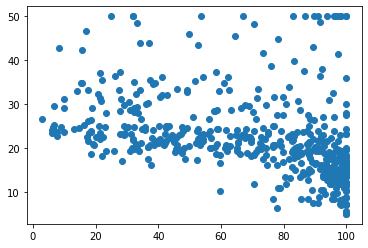

In [2]:
plt.scatter(dataset['age'], dataset['medv'])

In [3]:
spline_cube = dmatrix('bs(x, knots=(20,30,40,50))', {'x': dataset['age']})
spline_fit = sm.GLM(dataset['medv'], spline_cube).fit()
natural_spline = dmatrix('cr(x, knots=(20,30,40,50))', {'x': dataset['age']})
spline_natural = sm.GLM(dataset['medv'], natural_spline).fit()

In [4]:
range = np.linspace(dataset['age'].min(), dataset['age'].max(), 50)
cubic_line = spline_fit.predict(dmatrix('bs(range, knots=(20,30,40,50))', {'range': range}))
line_natural = spline_natural.predict(dmatrix('cr(range, knots=(20,30,40,50))', {'range': range}))

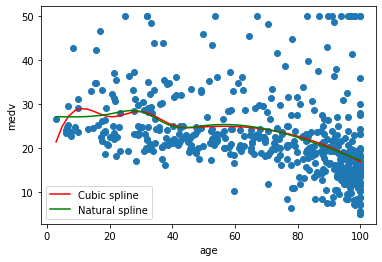

In [9]:
plt.plot(range, cubic_line, color='r', label='Cubic spline')
plt.plot(range, line_natural, color='g', label='Natural spline')
plt.legend()
plt.scatter(dataset['age'], dataset['medv'])
plt.xlabel('age')
plt.ylabel('medv')
plt.show()